In [1]:
import pylab as plb
import scipy as sy
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import numpy as np
import math

<Figure size 640x480 with 0 Axes>

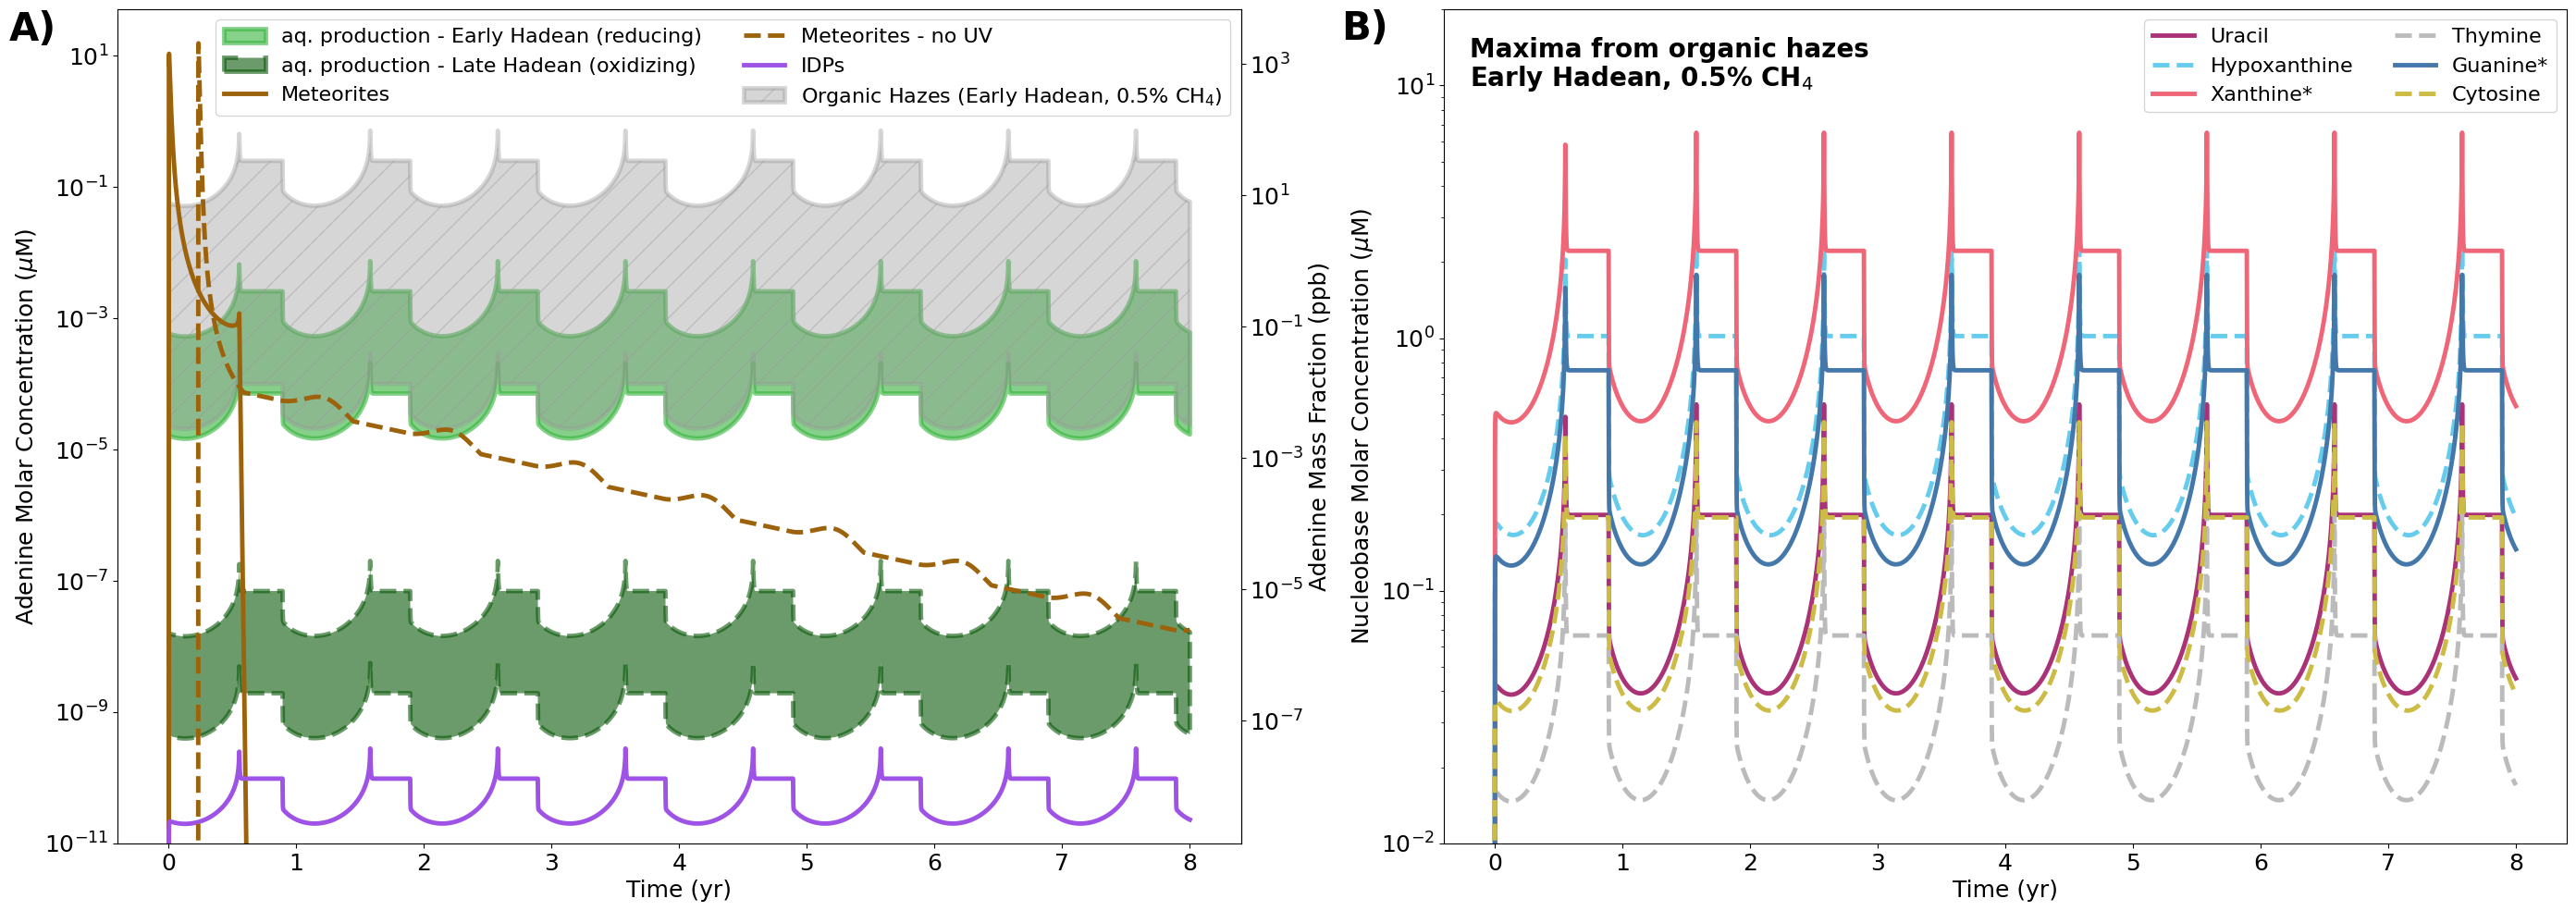

In [2]:
plt.clf()

#Variable Declarations
w_i = 60.7e-9
m_dot_I = 6e8
f_s = 0.32
r = 40.
rho = 2185.
r_p = 1.
A_p = math.pi*r_p**2
r_g = 500.
tau_d_1cm = 4.9e-3
tau_d_5cm = 0.12
tau_d_10cm = 0.48
R_plus = 6371000
gamma = 31557600
rho_w = 1000.
T_50 = (273.15+50)
T_65 = (273.15+65)
T_80 = (273.15+80)
k_i_50 = 10**(-5902/T_50 + 8.15)
k_A_65 = 10**(-5902/T_65 + 8.15)
k_i_80 = 10**(-5902/T_80 + 8.15)
k_G_65 = 10**(-6330/T_65 + 9.40)
k_U_65 = 10**(-7649/T_65 + 11.76)
k_C_65 = 10**(-5620/T_65 + 8.69)
k_T_65 = 10**(-7709/T_65 + 11.24)
k_X_65 = 10**(-6230/T_65 + 9.42)
k_Hy_65 = 10**(-5270/T_65 + 7.95)
tau_s = 1.
P_CAM = 3.5
P_IDN =4.5
P_COL = 6.
delta_CAM = 0.5
delta_IDN = 0.2
delta_COL = 0.5
sp_CAM = 0.3
sp_IDN = 0.85
sp_COL = 0.3
min_water = 0.001 # 1mm
S = 0.95 #Seepage rate 0.36525
Phi = 1e-4
F = 0.4 #W/m^2
lambda_uv = 225e-9
h = 6.626e-34
c = 2.9979e8
mu = .13513 #kg/mol
mu_HCN = 0.0270253
mu_Adenine = 0.13513
mu_Guanine = 0.15113
mu_Uracil = 0.1120868
mu_Cytosine = 0.1111
mu_Thymine = 0.1261133
mu_2amino = 0.084077 
mu_ribose = 0.15013
mu_formaldehyde = 0.030031
mu_xanthine = 0.15211
mu_hypoxanthine = 0.1361115
N_A = 6.022e23 #Avogadro's number
rho_i = 1470
d = 2*(3*mu/(4*math.pi*N_A*rho_i))**(1./3)
rho_G = 2200
d_G = 2*(3*mu_Guanine/(4*math.pi*N_A*rho_G))**(1./3)
rho_U = 1320
d_U = 2*(3*mu_Uracil/(4*math.pi*N_A*rho_U))**(1./3)
rho_C = 1550
d_C = 2*(3*mu_Cytosine/(4*math.pi*N_A*rho_C))**(1./3)
rho_T = 1230
d_T = 2*(3*mu_Thymine/(4*math.pi*N_A*rho_T))**(1./3)
rho_R = 800
d_R = 2*(3*mu_ribose/(4*math.pi*N_A*rho_R))**(1./3)
rho_two = 1200
d_two = 2*(3*mu_2amino/(4*math.pi*N_A*rho_two))**(1./3)
rho_F = 815
d_F = 2*(3*mu_formaldehyde/(4*math.pi*N_A*rho_F))**(1./3)
rho_X = 1600
d_X = 2*(3*mu_xanthine/(4*math.pi*N_A*rho_X))**(1./3)
rho_Hy = 2000
d_Hy = 2*(3*mu_hypoxanthine/(4*math.pi*N_A*rho_Hy))**(1./3)
#Fraction of surviving organics during entry
f_s_IDP = 0.06
f_s_Met = 0.32

#Organic Haze Values
#Trainer et al. (2006) 1e13 to 3e15 g/yr
#m_dot_haze_5 = 522.e-6/(6/365.25)  # 522 mg / 6 days to kg/yr our experiments
#m_dot_haze_05 = 72.e-6/(6/365.25)
#m_dot_haze_5_min = 1.e11*7.
m_dot_haze_05_min = 4.9e11
#m_dot_haze_5_max = 1.e11*7.
m_dot_haze_05_max = 8.9e14

C_Adenine_5 = 2.1e-6 #2.1ppm
C_Adenine_05_max = 6.3e-6
C_Adenine_05_min = 4.6e-6

C_Guanine_05_max = 17.5e-6 #using high methane experiment as upper limit
C_Cytosine_05_max = 3.46e-6
C_Uracil_05_max = 4.e-6
C_Thymine_05_max = 1.7e-6
C_Hypoxanthine_05_max = 21.4e-6
C_Xanthine_05_max = 65e-6 #using high methane experiment as upper limit

#m_dot_Adenine_haze5 = m_dot_haze_5*C_Adenine_5
m_dot_Adenine_haze05_min = m_dot_haze_05_min*C_Adenine_05_min
m_dot_Adenine_haze05_max = m_dot_haze_05_max*C_Adenine_05_max

m_dot_Guanine_haze05_max = m_dot_haze_05_max*C_Guanine_05_max
m_dot_Cytosine_haze05_max = m_dot_haze_05_max*C_Cytosine_05_max
m_dot_Uracil_haze05_max = m_dot_haze_05_max*C_Uracil_05_max
m_dot_Thymine_haze05_max = m_dot_haze_05_max*C_Thymine_05_max
m_dot_Xanthine_haze05_max = m_dot_haze_05_max*C_Xanthine_05_max
m_dot_Hypoxanthine_haze05_max = m_dot_haze_05_max*C_Hypoxanthine_05_max

#UV photodissociation rate (kg/yr/m^2)
M_uv_dot_A = ((Phi*F*lambda_uv*gamma*mu)/(h*c*N_A))
M_uv_dot_G = ((Phi*F*lambda_uv*gamma*mu_Guanine)/(h*c*N_A))
M_uv_dot_U = ((Phi*F*lambda_uv*gamma*mu_Uracil)/(h*c*N_A))
M_uv_dot_C = ((Phi*F*lambda_uv*gamma*mu_Cytosine)/(h*c*N_A))
M_uv_dot_T = ((Phi*F*lambda_uv*gamma*mu_Thymine)/(h*c*N_A))
M_uv_dot_2 = ((Phi*F*lambda_uv*gamma*mu_2amino)/(h*c*N_A))
M_uv_dot_R = ((Phi*F*lambda_uv*gamma*mu_ribose)/(h*c*N_A))
M_uv_dot_H = ((Phi*F*lambda_uv*gamma*mu_HCN)/(h*c*N_A))
M_uv_dot_F = ((Phi*F*lambda_uv*gamma*mu_formaldehyde)/(h*c*N_A))
M_uv_dot_X = ((Phi*F*lambda_uv*gamma*mu_xanthine)/(h*c*N_A))
M_uv_dot_Hy = ((Phi*F*lambda_uv*gamma*mu_hypoxanthine)/(h*c*N_A))

#Conversion from molar to mass mixing ratios
def molar2mass(x):
    return x * 1.e3 *mu_Adenine

def mass2molar(x):
    return x / 1.e3 / mu_Adenine

#Experimental yields
Adenine_lower = 0.005
Adenine_upper = 0.18
Guanine_lower = 6.7e-5
Guanine_upper = 0.2
Cytosine = 0.036
Uracil_lower = 1.7e-5
Uracil_upper = 0.018
Thymine = 0.012
Two_Amino_oxazole = 0.0011
Ribose = 3.6e-4
Formaldehyde = 0.036

#Mass influx from rain-out, data gathered from ChemKM non-equilibrium atmospheric models
HCN_mass_influx_ox = 3.42599458e-12
HCN_mass_influx_red = 1.25776186e-07
H2CN_mass_influx_red = 6.01494508e-12
H2CN_mass_influx_ox = 1.15285175e-09#4.11794768e-09

m_dot_HCN_ox = HCN_mass_influx_ox*4*math.pi*R_plus**2
m_dot_HCN_red = HCN_mass_influx_red*4*math.pi*R_plus**2
m_dot_H2CO_red = H2CN_mass_influx_red*4*math.pi*R_plus**2

#Plot A
m_dot_Adenine_red = m_dot_HCN_red*mu_Adenine/mu_HCN
m_dot_Adenine_ox = m_dot_HCN_ox*mu_Adenine/mu_HCN

#Plot B
m_dot_Guanine_red = m_dot_HCN_red*mu_Guanine/mu_HCN
m_dot_Uracil_red = m_dot_HCN_red*mu_Uracil/mu_HCN
m_dot_Cytosine_red = m_dot_HCN_red*mu_Cytosine/mu_HCN
m_dot_Thymine_red = m_dot_HCN_red*mu_Thymine/mu_HCN
m_dot_2amino_red = m_dot_HCN_red*mu_2amino/mu_HCN
m_dot_Ribose_red = m_dot_HCN_red*mu_ribose/mu_HCN
m_dot_Formaldehyde_red = m_dot_HCN_red*mu_formaldehyde/mu_HCN

rho_HCN = 687
d_HCN = 2*(3*mu_HCN/(4*math.pi*N_A*rho_HCN))**(1./3)


E_50 = (S-0.12 + 0.06*50)
E_65 = (S-0.12 + 0.06*65)
E_80 = (S-0.12 + 0.06*80)


tmax = 8 #years
level = 16

nt = (2**level) + 1 #Choosing nt to have twice as many grid points as nx
    
# Array for plotting
t = np.linspace(0,tmax,nt)

# Calculate delta_t
delta_t = t[2] - t[1]

#Constant seepage mass per year
m_seepage_rate = math.pi*rho_w*r_p**2*S

m_i0 = (4./3)*w_i*f_s*r**3*rho*A_p/r_g**2

    
L_IDN_65_IDP = np.zeros(shape=(nt))
L_IDN_65_Met = np.zeros(shape=(nt))
L_COL_65_Met = np.zeros(shape=(nt))
L_COL_65_IDP = np.zeros(shape=(nt))

m_IDN_65_IDP = np.zeros(shape=(nt))
m_IDN_65_Met = np.zeros(shape=(nt))
m_COL_65_Met = np.zeros(shape=(nt))
m_COL_65_IDP = np.zeros(shape=(nt))

m_IDN_65_IDP_A = np.zeros(shape=(nt))
m_IDN_65_Met_A = np.zeros(shape=(nt))
m_COL_65_Met_A = np.zeros(shape=(nt))
m_COL_65_IDP_A = np.zeros(shape=(nt))

C_IDN_65_IDP = np.zeros(shape=(nt))
C_IDN_65_Met = np.zeros(shape=(nt))
C_COL_65_Met = np.zeros(shape=(nt))
C_COL_65_IDP = np.zeros(shape=(nt))

#HCN initialize
m_IDN_65_HCN_ox = np.zeros(shape=(nt))
C_IDN_65_HCN_ox = np.zeros(shape=(nt))
m_COL_65_HCN_ox = np.zeros(shape=(nt))
C_COL_65_HCN_ox = np.zeros(shape=(nt))
m_IDN_65_HCN_red = np.zeros(shape=(nt))
C_IDN_65_HCN_red = np.zeros(shape=(nt))
m_COL_65_HCN_red = np.zeros(shape=(nt))
C_COL_65_HCN_red = np.zeros(shape=(nt))

#Biomolecule initialize
m_IDN_65_Adenine_red = np.zeros(shape=(nt))
C_IDN_65_Adenine_red = np.zeros(shape=(nt))
m_COL_65_Adenine_red = np.zeros(shape=(nt))
C_COL_65_Adenine_red = np.zeros(shape=(nt))
m_IDN_65_Guanine_red = np.zeros(shape=(nt))
C_IDN_65_Guanine_red = np.zeros(shape=(nt))
m_COL_65_Guanine_red = np.zeros(shape=(nt))
C_COL_65_Guanine_red = np.zeros(shape=(nt))
m_IDN_65_Uracil_red = np.zeros(shape=(nt))
C_IDN_65_Uracil_red = np.zeros(shape=(nt))
m_COL_65_Uracil_red = np.zeros(shape=(nt))
C_COL_65_Uracil_red = np.zeros(shape=(nt))
m_IDN_65_Cytosine_red = np.zeros(shape=(nt))
C_IDN_65_Cytosine_red = np.zeros(shape=(nt))
m_COL_65_Cytosine_red = np.zeros(shape=(nt))
C_COL_65_Cytosine_red = np.zeros(shape=(nt))
m_IDN_65_Thymine_red = np.zeros(shape=(nt))
C_IDN_65_Thymine_red = np.zeros(shape=(nt))
m_COL_65_Thymine_red = np.zeros(shape=(nt))
C_COL_65_Thymine_red = np.zeros(shape=(nt))
m_IDN_65_2amino_red = np.zeros(shape=(nt))
C_IDN_65_2amino_red = np.zeros(shape=(nt))
m_COL_65_2amino_red = np.zeros(shape=(nt))
C_COL_65_2amino_red = np.zeros(shape=(nt))
m_IDN_65_Ribose_red = np.zeros(shape=(nt))
C_IDN_65_Ribose_red = np.zeros(shape=(nt))
m_COL_65_Ribose_red = np.zeros(shape=(nt))
C_COL_65_Ribose_red = np.zeros(shape=(nt))
m_IDN_65_Adenine_ox = np.zeros(shape=(nt))
C_IDN_65_Adenine_ox = np.zeros(shape=(nt))
m_IDN_65_Formaldehyde_red = np.zeros(shape=(nt))
C_IDN_65_Formaldehyde_red = np.zeros(shape=(nt))

m_IDN_65_H2CO_red = np.zeros(shape=(nt))
C_IDN_65_H2CO_red = np.zeros(shape=(nt))


#Initialize for Hazes
m_IDN_65_Adenine_haze5 = np.zeros(shape=(nt))
C_IDN_65_Adenine_haze5 = np.zeros(shape=(nt))

m_IDN_65_Adenine_haze05_min = np.zeros(shape=(nt))
C_IDN_65_Adenine_haze05_min = np.zeros(shape=(nt))
m_IDN_65_Adenine_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Adenine_haze05_max = np.zeros(shape=(nt))

m_IDN_65_Guanine_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Guanine_haze05_max = np.zeros(shape=(nt))
m_IDN_65_Cytosine_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Cytosine_haze05_max = np.zeros(shape=(nt))
m_IDN_65_Uracil_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Uracil_haze05_max = np.zeros(shape=(nt))
m_IDN_65_Thymine_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Thymine_haze05_max = np.zeros(shape=(nt))
m_IDN_65_Xanthine_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Xanthine_haze05_max = np.zeros(shape=(nt))
m_IDN_65_Hypoxanthine_haze05_max = np.zeros(shape=(nt))
C_IDN_65_Hypoxanthine_haze05_max = np.zeros(shape=(nt))

# Array for plotting
t = np.linspace(0,tmax,nt)

# Calculate delta_t
delta_t = t[2] - t[1]

#Constant seepage mass per year
m_seepage_rate = math.pi*rho_w*r_p**2*S

#Initial conditions

#Water levels
L_IDN_65_IDP[0] = r_p - min_water
L_IDN_65_Met[0] = r_p - min_water
L_COL_65_Met[0] = r_p - min_water
L_COL_65_IDP[0] = r_p - min_water

#Water mass
m_IDN_65_IDP[0] = math.pi*rho_w*r_p**2*(r_p-L_IDN_65_Met[0])
m_IDN_65_Met[0] = math.pi*rho_w*r_p**2*(r_p-L_IDN_65_Met[0])
m_COL_65_Met[0] = math.pi*rho_w*r_p**2*(r_p-L_COL_65_Met[0])
m_COL_65_IDP[0] = math.pi*rho_w*r_p**2*(r_p-L_COL_65_Met[0])

#Biomolecule masses and concentrations
m_IDN_65_IDP_A[0] = 0
m_IDN_65_Met_A[0] = 0
m_COL_65_Met_A[0] = 0
m_COL_65_IDP_A[0] = 0

C_IDN_65_IDP[0] = 0
C_IDN_65_Met[0] = 0
C_COL_65_Met[0] = 0
C_COL_65_IDP[0] = 0

m_IDN_65_HCN_ox[0] = 0
C_IDN_65_HCN_ox[0] = 0
m_COL_65_HCN_ox[0] = 0
C_COL_65_HCN_ox[0] = 0
m_IDN_65_HCN_red[0] = 0
C_IDN_65_HCN_red[0] = 0
m_COL_65_HCN_red[0] = 0
C_COL_65_HCN_red[0] = 0

m_IDN_65_Adenine_red[0] = 0
C_IDN_65_Adenine_red[0] = 0
m_COL_65_Adenine_red[0] = 0
C_COL_65_Adenine_red[0] = 0
m_IDN_65_Guanine_red[0] = 0
C_IDN_65_Guanine_red[0] = 0
m_COL_65_Guanine_red[0] = 0
C_COL_65_Guanine_red[0] = 0
m_IDN_65_Uracil_red[0] = 0
C_IDN_65_Uracil_red[0] = 0
m_COL_65_Uracil_red[0] = 0
C_COL_65_Uracil_red[0] = 0
m_IDN_65_Cytosine_red[0] = 0
C_IDN_65_Cytosine_red[0] = 0
m_COL_65_Cytosine_red[0] = 0
C_COL_65_Cytosine_red[0] = 0
m_IDN_65_Thymine_red[0] = 0
C_IDN_65_Thymine_red[0] = 0
m_COL_65_Thymine_red[0] = 0
C_COL_65_Thymine_red[0] = 0
m_IDN_65_2amino_red[0] = 0
C_IDN_65_2amino_red[0] = 0
m_COL_65_2amino_red[0] = 0
C_COL_65_2amino_red[0] = 0
m_IDN_65_Ribose_red[0] = 0
C_IDN_65_Ribose_red[0] = 0
m_COL_65_Ribose_red[0] = 0
C_COL_65_Ribose_red[0] = 0

m_IDN_65_Adenine_ox[0] = 0
C_IDN_65_Adenine_ox[0] = 0
m_IDN_65_Formaldehyde_red[0] = 0
C_IDN_65_Formaldehyde_red[0] = 0

m_IDN_65_H2CO_red[0] = 0
C_IDN_65_H2CO_red[0] = 0

m_IDN_65_Adenine_haze5[0] = 0
C_IDN_65_Adenine_haze5[0] = 0
m_IDN_65_Adenine_haze05_min[0] = 0
C_IDN_65_Adenine_haze05_min[0] = 0
m_IDN_65_Adenine_haze05_max[0] = 0
C_IDN_65_Adenine_haze05_max[0] = 0

m_IDN_65_Guanine_haze05_max[0] = 0
C_IDN_65_Guanine_haze05_max[0] = 0
m_IDN_65_Cytosine_haze05_max[0] = 0
C_IDN_65_Cytosine_haze05_max[0] = 0
m_IDN_65_Uracil_haze05_max[0] = 0
C_IDN_65_Uracil_haze05_max[0] = 0
m_IDN_65_Thymine_haze05_max[0] = 0
C_IDN_65_Thymine_haze05_max[0] = 0
m_IDN_65_Xanthine_haze05_max[0] = 0
C_IDN_65_Xanthine_haze05_max[0] = 0
m_IDN_65_Hypoxanthine_haze05_max[0] = 0
C_IDN_65_Hypoxanthine_haze05_max[0] = 0

pause_IDN_65_Met = 0
pause_COL_65_Met = 0

m_i0 = (4./3)*w_i*f_s_Met*r**3*rho*A_p/r_g**2

# Solve ODE numerically
# Biomolecule evolution from meteorites, IDPs, and aqueous production from atmospheric precursors
for n in range(0,nt-1):
    
    #Intermediate and wet models for meteorites
    
    L_IDN_65_Met[n+1] = E_65*delta_t + L_IDN_65_Met[n] - (delta_t*P_IDN)*(1 + delta_IDN*np.sin(2*math.pi*(t[n] - sp_IDN)/tau_s))
    if (L_IDN_65_Met[n+1] < 0):
        L_IDN_65_Met[n+1] = 0
    if (L_IDN_65_Met[n+1] >= (r_p - min_water)):
        L_IDN_65_Met[n+1] = r_p - min_water
        if (m_IDN_65_Met_A[n]/(rho_i*d) < A_p):
            m_IDN_65_Met_A[n+1] = m_IDN_65_Met_A[n] - delta_t*M_uv_dot_A*m_IDN_65_Met_A[n]/(rho_i*d)
        else:
            m_IDN_65_Met_A[n+1] = m_IDN_65_Met_A[n] - delta_t*M_uv_dot_A*A_p
        pause_IDN_65_Met = pause_IDN_65_Met + 1
    else:
        m_IDN_65_Met_A[n+1] = m_IDN_65_Met_A[n] + delta_t*m_i0*np.e**(-t[n-pause_IDN_65_Met]*(gamma*k_A_65 + (1./tau_d_1cm)))/tau_d_1cm - delta_t*gamma*k_A_65*m_IDN_65_Met_A[n] - delta_t*m_IDN_65_Met_A[n]*m_seepage_rate/m_IDN_65_Met[n]
    if m_IDN_65_Met_A[n+1] < 0:
        m_IDN_65_Met_A[n+1] = 0
    m_IDN_65_Met[n+1] = math.pi*rho_w*r_p**2*(r_p-L_IDN_65_Met[n+1])
    
    L_COL_65_Met[n+1] = E_65*delta_t + L_COL_65_Met[n] - (delta_t*P_COL)*(1 + delta_COL*np.sin(2*math.pi*(t[n] - sp_COL)/tau_s))
    if (L_COL_65_Met[n+1] < 0):
        L_COL_65_Met[n+1] = 0
    if (L_COL_65_Met[n+1] >= (r_p - min_water)):
        L_COL_65_Met[n+1] = r_p - min_water
        if (m_IDN_65_Met_A[n]/(rho_i*d) < A_p):
            m_COL_65_Met_A[n+1] = m_COL_65_Met_A[n] - delta_t*M_uv_dot_A*m_COL_65_Met_A[n]/(rho_i*d)
        else:
            m_COL_65_Met_A[n+1] = m_COL_65_Met_A[n] - delta_t*M_uv_dot_A*A_p
        pause_COL_65_Met = pause_COL_65_Met + 1
    else:
        m_COL_65_Met_A[n+1] = m_COL_65_Met_A[n] + delta_t*m_i0*np.e**(-t[n-pause_COL_65_Met]*(gamma*k_A_65 + (1./tau_d_1cm)))/tau_d_1cm - delta_t*gamma*k_A_65*m_COL_65_Met_A[n] - delta_t*m_COL_65_Met_A[n]*m_seepage_rate/m_COL_65_Met[n]
    if m_COL_65_Met_A[n+1] < 0:
        m_COL_65_Met_A[n+1] = 0
    m_COL_65_Met[n+1] = math.pi*rho_w*r_p**2*(r_p-L_COL_65_Met[n+1])
    
    #Intermediate models (6 months wet, 6 month dry) IDP and aqueous production
    
    L_IDN_65_IDP[n+1] = E_65*delta_t + L_IDN_65_IDP[n] - (delta_t*P_IDN)*(1 + delta_IDN*np.sin(2*math.pi*(t[n] - sp_IDN)/tau_s))
    if (L_IDN_65_IDP[n+1] < 0):
        L_IDN_65_IDP[n+1] = 0
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_IDP_A[n]/(rho_i*d) < A_p):
            m_IDN_65_IDP_A[n+1] = m_IDN_65_IDP_A[n] + ((delta_t*w_i*m_dot_I*f_s_IDP*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_IDN_65_IDP_A[n]/(rho_i*d)
        else:
            m_IDN_65_IDP_A[n+1] = m_IDN_65_IDP_A[n] + ((delta_t*w_i*m_dot_I*f_s_IDP*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_IDN_65_IDP_A[n+1] = m_IDN_65_IDP_A[n] + ((delta_t*w_i*m_dot_I*f_s_IDP*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_IDN_65_IDP_A[n] - delta_t*m_IDN_65_IDP_A[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_IDP_A[n+1] < 0:
        m_IDN_65_IDP_A[n+1] = 0
    m_IDN_65_IDP[n+1] = math.pi*rho_w*r_p**2*(r_p-L_IDN_65_IDP[n+1])
    
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_HCN_ox[n]/(rho_HCN*d_HCN) < A_p):
            m_IDN_65_HCN_ox[n+1] = m_IDN_65_HCN_ox[n] + ((delta_t*m_dot_HCN_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*m_IDN_65_HCN_ox[n]/(rho_HCN*d_HCN)
        else:
            m_IDN_65_HCN_ox[n+1] = m_IDN_65_HCN_ox[n] + ((delta_t*m_dot_HCN_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*A_p
    else:
        m_IDN_65_HCN_ox[n+1] = m_IDN_65_HCN_ox[n] + ((delta_t*m_dot_HCN_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*m_IDN_65_HCN_ox[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_HCN_ox[n+1] < 0:
        m_IDN_65_HCN_ox[n+1] = 0
            
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_H2CO_red[n]/(rho_F*d_F) < A_p):
            m_IDN_65_H2CO_red[n+1] = m_IDN_65_H2CO_red[n] + ((delta_t*m_dot_H2CO_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*m_IDN_65_H2CO_red[n]/(rho_F*d_F)
        else:
            m_IDN_65_H2CO_red[n+1] = m_IDN_65_H2CO_red[n] + ((delta_t*m_dot_H2CO_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_F*A_p
    else:
        m_IDN_65_H2CO_red[n+1] = m_IDN_65_H2CO_red[n] + ((delta_t*m_dot_H2CO_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*m_IDN_65_H2CO_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_H2CO_red[n+1] < 0:
        m_IDN_65_H2CO_red[n+1] = 0   
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_HCN_red[n]/(rho_HCN*d_HCN) < A_p):
            m_IDN_65_HCN_red[n+1] = m_IDN_65_HCN_red[n] + ((delta_t*m_dot_HCN_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*m_IDN_65_HCN_red[n]/(rho_HCN*d_HCN)
        else:
            m_IDN_65_HCN_red[n+1] = m_IDN_65_HCN_red[n] + ((delta_t*m_dot_HCN_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*A_p
    else:
        m_IDN_65_HCN_red[n+1] = m_IDN_65_HCN_red[n] + ((delta_t*m_dot_HCN_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*m_IDN_65_HCN_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_HCN_red[n+1] < 0:
        m_IDN_65_HCN_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Adenine_red[n]/(rho_i*d) < A_p):
            m_IDN_65_Adenine_red[n+1] = m_IDN_65_Adenine_red[n] + ((delta_t*m_dot_Adenine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_IDN_65_Adenine_red[n]/(rho_i*d)
        else:
            m_IDN_65_Adenine_red[n+1] = m_IDN_65_Adenine_red[n] + ((delta_t*m_dot_Adenine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_IDN_65_Adenine_red[n+1] = m_IDN_65_Adenine_red[n] + ((delta_t*m_dot_Adenine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_IDN_65_Adenine_red[n] - delta_t*m_IDN_65_Adenine_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Adenine_red[n+1] < 0:
        m_IDN_65_Adenine_red[n+1] = 0
        
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Guanine_red[n]/(rho_G*d_G) < A_p):
            m_IDN_65_Guanine_red[n+1] = m_IDN_65_Guanine_red[n] + ((delta_t*m_dot_Guanine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_G*m_IDN_65_Guanine_red[n]/(rho_G*d_G)
        else:
            m_IDN_65_Guanine_red[n+1] = m_IDN_65_Guanine_red[n] + ((delta_t*m_dot_Guanine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_G*A_p
    else:
        m_IDN_65_Guanine_red[n+1] = m_IDN_65_Guanine_red[n] + ((delta_t*m_dot_Guanine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_G_65*m_IDN_65_Guanine_red[n] - delta_t*m_IDN_65_Guanine_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Guanine_red[n+1] < 0:
        m_IDN_65_Guanine_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Uracil_red[n]/(rho_U*d_U) < A_p):
            m_IDN_65_Uracil_red[n+1] = m_IDN_65_Uracil_red[n] + ((delta_t*m_dot_Uracil_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_U*m_IDN_65_Uracil_red[n]/(rho_U*d_U)
        else:
            m_IDN_65_Uracil_red[n+1] = m_IDN_65_Uracil_red[n] + ((delta_t*m_dot_Uracil_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_U*A_p
    else:
        m_IDN_65_Uracil_red[n+1] = m_IDN_65_Uracil_red[n] + ((delta_t*m_dot_Uracil_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_U_65*m_IDN_65_Uracil_red[n] - delta_t*m_IDN_65_Uracil_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Uracil_red[n+1] < 0:
        m_IDN_65_Uracil_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Cytosine_red[n]/(rho_C*d_C) < A_p):
            m_IDN_65_Cytosine_red[n+1] = m_IDN_65_Cytosine_red[n] + ((delta_t*m_dot_Cytosine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_C*m_IDN_65_Cytosine_red[n]/(rho_C*d_C)
        else:
            m_IDN_65_Cytosine_red[n+1] = m_IDN_65_Cytosine_red[n] + ((delta_t*m_dot_Cytosine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_C*A_p
    else:
        m_IDN_65_Cytosine_red[n+1] = m_IDN_65_Cytosine_red[n] + ((delta_t*m_dot_Cytosine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_C_65*m_IDN_65_Cytosine_red[n] - delta_t*m_IDN_65_Cytosine_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Cytosine_red[n+1] < 0:
        m_IDN_65_Cytosine_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Thymine_red[n]/(rho_T*d_T) < A_p):
            m_IDN_65_Thymine_red[n+1] = m_IDN_65_Thymine_red[n] + ((delta_t*m_dot_Thymine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_T*m_IDN_65_Thymine_red[n]/(rho_T*d_T)
        else:
            m_IDN_65_Thymine_red[n+1] = m_IDN_65_Thymine_red[n] + ((delta_t*m_dot_Thymine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_T*A_p
    else:
        m_IDN_65_Thymine_red[n+1] = m_IDN_65_Thymine_red[n] + ((delta_t*m_dot_Thymine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_T_65*m_IDN_65_Thymine_red[n] - delta_t*m_IDN_65_Thymine_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Thymine_red[n+1] < 0:
        m_IDN_65_Thymine_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_2amino_red[n]/(rho_two*d_two) < A_p):
            m_IDN_65_2amino_red[n+1] = m_IDN_65_2amino_red[n] + ((delta_t*m_dot_2amino_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_2*m_IDN_65_2amino_red[n]/(rho_two*d_two)
        else:
            m_IDN_65_2amino_red[n+1] = m_IDN_65_2amino_red[n] + ((delta_t*m_dot_2amino_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_2*A_p
    else:
        m_IDN_65_2amino_red[n+1] = m_IDN_65_2amino_red[n] + ((delta_t*m_dot_2amino_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*m_IDN_65_2amino_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_2amino_red[n+1] < 0:
        m_IDN_65_2amino_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Ribose_red[n]/(rho_R*d_R) < A_p):
            m_IDN_65_Ribose_red[n+1] = m_IDN_65_Ribose_red[n] + ((delta_t*m_dot_Ribose_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_R*m_IDN_65_Ribose_red[n]/(rho_R*d_R)
        else:
            m_IDN_65_Ribose_red[n+1] = m_IDN_65_Ribose_red[n] + ((delta_t*m_dot_Ribose_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_R*A_p
    else:
        m_IDN_65_Ribose_red[n+1] = m_IDN_65_Ribose_red[n] + ((delta_t*m_dot_Ribose_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*m_IDN_65_Ribose_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Ribose_red[n+1] < 0:
        m_IDN_65_Ribose_red[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Adenine_ox[n]/(rho_i*d) < A_p):
            m_IDN_65_Adenine_ox[n+1] = m_IDN_65_Adenine_ox[n] + ((delta_t*m_dot_Adenine_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_IDN_65_Adenine_ox[n]/(rho_i*d)
        else:
            m_IDN_65_Adenine_ox[n+1] = m_IDN_65_Adenine_ox[n] + ((delta_t*m_dot_Adenine_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_IDN_65_Adenine_ox[n+1] = m_IDN_65_Adenine_ox[n] + ((delta_t*m_dot_Adenine_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_IDN_65_Adenine_ox[n] - delta_t*m_IDN_65_Adenine_ox[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Adenine_ox[n+1] < 0:
        m_IDN_65_Adenine_ox[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Formaldehyde_red[n]/(rho_F*d_F) < A_p):
            m_IDN_65_Formaldehyde_red[n+1] = m_IDN_65_Formaldehyde_red[n] + ((delta_t*m_dot_Formaldehyde_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_F*m_IDN_65_Formaldehyde_red[n]/(rho_F*d_F)
        else:
            m_IDN_65_Formaldehyde_red[n+1] = m_IDN_65_Formaldehyde_red[n] + ((delta_t*m_dot_Formaldehyde_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_F*A_p
    else:
        m_IDN_65_Formaldehyde_red[n+1] = m_IDN_65_Formaldehyde_red[n] + ((delta_t*m_dot_Formaldehyde_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*m_IDN_65_Formaldehyde_red[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Formaldehyde_red[n+1] < 0:
        m_IDN_65_Formaldehyde_red[n+1] = 0
        
    #Organic Hazes
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Adenine_haze05_min[n]/(rho_i*d) < A_p):
            m_IDN_65_Adenine_haze05_min[n+1] = m_IDN_65_Adenine_haze05_min[n] + ((delta_t*m_dot_Adenine_haze05_min*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_IDN_65_Adenine_haze05_min[n]/(rho_i*d)
        else:
            m_IDN_65_Adenine_haze05_min[n+1] = m_IDN_65_Adenine_haze05_min[n] + ((delta_t*m_dot_Adenine_haze05_min*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_IDN_65_Adenine_haze05_min[n+1] = m_IDN_65_Adenine_haze05_min[n] + ((delta_t*m_dot_Adenine_haze05_min*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_IDN_65_Adenine_haze05_min[n] - delta_t*m_IDN_65_Adenine_haze05_min[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Adenine_haze05_min[n+1] < 0:
        m_IDN_65_Adenine_haze05_min[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Adenine_haze05_max[n]/(rho_i*d) < A_p):
            m_IDN_65_Adenine_haze05_max[n+1] = m_IDN_65_Adenine_haze05_max[n] + ((delta_t*m_dot_Adenine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_IDN_65_Adenine_haze05_max[n]/(rho_i*d)
        else:
            m_IDN_65_Adenine_haze05_max[n+1] = m_IDN_65_Adenine_haze05_max[n] + ((delta_t*m_dot_Adenine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_IDN_65_Adenine_haze05_max[n+1] = m_IDN_65_Adenine_haze05_max[n] + ((delta_t*m_dot_Adenine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_IDN_65_Adenine_haze05_max[n] - delta_t*m_IDN_65_Adenine_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Adenine_haze05_max[n+1] < 0:
        m_IDN_65_Adenine_haze05_max[n+1] = 0
        
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Guanine_haze05_max[n]/(rho_G*d_G) < A_p):
            m_IDN_65_Guanine_haze05_max[n+1] = m_IDN_65_Guanine_haze05_max[n] + ((delta_t*m_dot_Guanine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_G*m_IDN_65_Guanine_haze05_max[n]/(rho_G*d_G)
        else:
            m_IDN_65_Guanine_haze05_max[n+1] = m_IDN_65_Guanine_haze05_max[n] + ((delta_t*m_dot_Guanine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_G*A_p
    else:
        m_IDN_65_Guanine_haze05_max[n+1] = m_IDN_65_Guanine_haze05_max[n] + ((delta_t*m_dot_Guanine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_G_65*m_IDN_65_Guanine_haze05_max[n] - delta_t*m_IDN_65_Guanine_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Guanine_haze05_max[n+1] < 0:
        m_IDN_65_Guanine_haze05_max[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Uracil_haze05_max[n]/(rho_U*d_U) < A_p):
            m_IDN_65_Uracil_haze05_max[n+1] = m_IDN_65_Uracil_haze05_max[n] + ((delta_t*m_dot_Uracil_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_U*m_IDN_65_Uracil_haze05_max[n]/(rho_U*d_U)
        else:
            m_IDN_65_Uracil_haze05_max[n+1] = m_IDN_65_Uracil_haze05_max[n] + ((delta_t*m_dot_Uracil_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_U*A_p
    else:
        m_IDN_65_Uracil_haze05_max[n+1] = m_IDN_65_Uracil_haze05_max[n] + ((delta_t*m_dot_Uracil_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_U_65*m_IDN_65_Uracil_haze05_max[n] - delta_t*m_IDN_65_Uracil_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Uracil_haze05_max[n+1] < 0:
        m_IDN_65_Uracil_haze05_max[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Cytosine_haze05_max[n]/(rho_C*d_C) < A_p):
            m_IDN_65_Cytosine_haze05_max[n+1] = m_IDN_65_Cytosine_haze05_max[n] + ((delta_t*m_dot_Cytosine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_C*m_IDN_65_Cytosine_haze05_max[n]/(rho_C*d_C)
        else:
            m_IDN_65_Cytosine_haze05_max[n+1] = m_IDN_65_Cytosine_haze05_max[n] + ((delta_t*m_dot_Cytosine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_C*A_p
    else:
        m_IDN_65_Cytosine_haze05_max[n+1] = m_IDN_65_Cytosine_haze05_max[n] + ((delta_t*m_dot_Cytosine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_C_65*m_IDN_65_Cytosine_haze05_max[n] - delta_t*m_IDN_65_Cytosine_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Cytosine_haze05_max[n+1] < 0:
        m_IDN_65_Cytosine_haze05_max[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Thymine_haze05_max[n]/(rho_T*d_T) < A_p):
            m_IDN_65_Thymine_haze05_max[n+1] = m_IDN_65_Thymine_haze05_max[n] + ((delta_t*m_dot_Thymine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_T*m_IDN_65_Thymine_haze05_max[n]/(rho_T*d_T)
        else:
            m_IDN_65_Thymine_haze05_max[n+1] = m_IDN_65_Thymine_haze05_max[n] + ((delta_t*m_dot_Thymine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_T*A_p
    else:
        m_IDN_65_Thymine_haze05_max[n+1] = m_IDN_65_Thymine_haze05_max[n] + ((delta_t*m_dot_Thymine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_T_65*m_IDN_65_Thymine_haze05_max[n] - delta_t*m_IDN_65_Thymine_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Thymine_haze05_max[n+1] < 0:
        m_IDN_65_Thymine_haze05_max[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Xanthine_haze05_max[n]/(rho_X*d_X) < A_p):
            m_IDN_65_Xanthine_haze05_max[n+1] = m_IDN_65_Xanthine_haze05_max[n] + ((delta_t*m_dot_Xanthine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_X*m_IDN_65_Xanthine_haze05_max[n]/(rho_X*d_X)
        else:
            m_IDN_65_Xanthine_haze05_max[n+1] = m_IDN_65_Xanthine_haze05_max[n] + ((delta_t*m_dot_Xanthine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_X*A_p
    else:
        m_IDN_65_Xanthine_haze05_max[n+1] = m_IDN_65_Xanthine_haze05_max[n] + ((delta_t*m_dot_Xanthine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_X_65*m_IDN_65_Xanthine_haze05_max[n] - delta_t*m_IDN_65_Xanthine_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Xanthine_haze05_max[n+1] < 0:
        m_IDN_65_Xanthine_haze05_max[n+1] = 0
        
    if (L_IDN_65_IDP[n+1] >= (r_p - min_water)):
        L_IDN_65_IDP[n+1] = r_p - min_water
        if (m_IDN_65_Hypoxanthine_haze05_max[n]/(rho_Hy*d_Hy) < A_p):
            m_IDN_65_Hypoxanthine_haze05_max[n+1] = m_IDN_65_Hypoxanthine_haze05_max[n] + ((delta_t*m_dot_Hypoxanthine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_Hy*m_IDN_65_Hypoxanthine_haze05_max[n]/(rho_Hy*d_Hy)
        else:
            m_IDN_65_Hypoxanthine_haze05_max[n+1] = m_IDN_65_Hypoxanthine_haze05_max[n] + ((delta_t*m_dot_Hypoxanthine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_Hy*A_p
    else:
        m_IDN_65_Hypoxanthine_haze05_max[n+1] = m_IDN_65_Hypoxanthine_haze05_max[n] + ((delta_t*m_dot_Hypoxanthine_haze05_max*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_Hy_65*m_IDN_65_Hypoxanthine_haze05_max[n] - delta_t*m_IDN_65_Hypoxanthine_haze05_max[n]*m_seepage_rate/m_IDN_65_IDP[n]
    if m_IDN_65_Hypoxanthine_haze05_max[n+1] < 0:
        m_IDN_65_Hypoxanthine_haze05_max[n+1] = 0
    
    #Wet models (Ponds don't dry completely) IDP and aqueous production
    
    L_COL_65_IDP[n+1] = E_65*delta_t + L_COL_65_IDP[n] - (delta_t*P_COL)*(1 + delta_COL*np.sin(2*math.pi*(t[n] - sp_COL)/tau_s))
    if (L_COL_65_IDP[n+1] < 0):
        L_COL_65_IDP[n+1] = 0
    if (L_COL_65_IDP[n+1] >= (r_p - min_water)):
        L_COL_65_IDP[n+1] = r_p - min_water
        if (m_COL_65_IDP_A[n]/(rho_i*d) < A_p):
            m_COL_65_IDP_A[n+1] = m_COL_65_IDP_A[n] + ((delta_t*w_i*m_dot_I*f_s_IDP*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_COL_65_IDP_A[n]/(rho_i*d)
        else:
            m_COL_65_IDP_A[n+1] = m_COL_65_IDP_A[n] + ((delta_t*w_i*m_dot_I*f_s_IDP*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_COL_65_IDP_A[n+1] = m_COL_65_IDP_A[n] + ((delta_t*w_i*m_dot_I*f_s_IDP*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_COL_65_IDP_A[n] - delta_t*m_COL_65_IDP_A[n]*m_seepage_rate/m_COL_65_IDP[n]
    if m_COL_65_IDP_A[n+1] < 0:
        m_COL_65_IDP_A[n+1] = 0
    m_COL_65_IDP[n+1] = math.pi*rho_w*r_p**2*(r_p-L_COL_65_IDP[n+1])
    
    if (L_COL_65_IDP[n+1] >= (r_p - min_water)):
        L_COL_65_IDP[n+1] = r_p - min_water
        if (m_COL_65_HCN_ox[n]/(rho_HCN*d_HCN) < A_p):
            m_COL_65_HCN_ox[n+1] = m_COL_65_HCN_ox[n] + ((delta_t*m_dot_HCN_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*m_COL_65_HCN_ox[n]/(rho_HCN*d_HCN)
        else:
            m_COL_65_HCN_ox[n+1] = m_COL_65_HCN_ox[n] + ((delta_t*m_dot_HCN_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*A_p
    else:
        m_COL_65_HCN_ox[n+1] = m_COL_65_HCN_ox[n] + ((delta_t*m_dot_HCN_ox*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_COL_65_HCN_ox[n] - delta_t*m_COL_65_HCN_ox[n]*m_seepage_rate/m_COL_65_IDP[n]
    if m_COL_65_HCN_ox[n+1] < 0:
        m_COL_65_HCN_ox[n+1] = 0
        
    if (L_COL_65_IDP[n+1] >= (r_p - min_water)):
        L_COL_65_IDP[n+1] = r_p - min_water
        if (m_COL_65_HCN_red[n]/(rho_HCN*d_HCN) < A_p):
            m_COL_65_HCN_red[n+1] = m_COL_65_HCN_red[n] + ((delta_t*m_dot_HCN_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*m_COL_65_HCN_red[n]/(rho_HCN*d_HCN)
        else:
            m_COL_65_HCN_red[n+1] = m_COL_65_HCN_red[n] + ((delta_t*m_dot_HCN_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_H*A_p
    else:
        m_COL_65_HCN_red[n+1] = m_COL_65_HCN_red[n] + ((delta_t*m_dot_HCN_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_COL_65_HCN_red[n] - delta_t*m_COL_65_HCN_red[n]*m_seepage_rate/m_COL_65_IDP[n]
    if m_COL_65_HCN_red[n+1] < 0:
        m_COL_65_HCN_red[n+1] = 0
        
    if (L_COL_65_IDP[n+1] >= (r_p - min_water)):
        L_COL_65_IDP[n+1] = r_p - min_water
        if (m_COL_65_Adenine_red[n]/(rho_i*d) < A_p):
            m_COL_65_Adenine_red[n+1] = m_COL_65_Adenine_red[n] + ((delta_t*m_dot_Adenine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*m_COL_65_Adenine_red[n]/(rho_i*d)
        else:
            m_COL_65_Adenine_red[n+1] = m_COL_65_Adenine_red[n] + ((delta_t*m_dot_Adenine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*M_uv_dot_A*A_p
    else:
        m_COL_65_Adenine_red[n+1] = m_COL_65_Adenine_red[n] + ((delta_t*m_dot_Adenine_red*A_p)/(4*np.pi*R_plus**2)) - delta_t*gamma*k_A_65*m_COL_65_Adenine_red[n] - delta_t*m_COL_65_Adenine_red[n]*m_seepage_rate/m_COL_65_IDP[n]
    if m_COL_65_Adenine_red[n+1] < 0:
        m_COL_65_Adenine_red[n+1] = 0
  
    #Compute concentrations biomolecule mass / water mass
    C_IDN_65_HCN_ox[n+1] = m_IDN_65_HCN_ox[n+1]/m_IDN_65_IDP[n+1]
    C_COL_65_HCN_ox[n+1] = m_COL_65_HCN_ox[n+1]/m_COL_65_IDP[n+1]
    C_IDN_65_HCN_red[n+1] = m_IDN_65_HCN_red[n+1]/m_IDN_65_IDP[n+1]
    C_COL_65_HCN_red[n+1] = m_COL_65_HCN_red[n+1]/m_COL_65_IDP[n+1]
    C_IDN_65_IDP[n+1] = m_IDN_65_IDP_A[n+1]/m_IDN_65_IDP[n+1]
    C_COL_65_IDP[n+1] = m_COL_65_IDP_A[n+1]/m_COL_65_IDP[n+1]
    C_IDN_65_Met[n+1] = m_IDN_65_Met_A[n+1]/m_IDN_65_Met[n+1]
    C_COL_65_Met[n+1] = m_COL_65_Met_A[n+1]/m_COL_65_Met[n+1]
    
    C_IDN_65_Adenine_red[n+1] = m_IDN_65_Adenine_red[n+1]/m_IDN_65_IDP[n+1]
    C_COL_65_Adenine_red[n+1] = m_COL_65_Adenine_red[n+1]/m_COL_65_IDP[n+1]
    C_IDN_65_Adenine_ox[n+1] = m_IDN_65_Adenine_ox[n+1]/m_IDN_65_IDP[n+1]
    
    C_IDN_65_Guanine_red[n+1] = m_IDN_65_Guanine_red[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Uracil_red[n+1] = m_IDN_65_Uracil_red[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Cytosine_red[n+1] = m_IDN_65_Cytosine_red[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Thymine_red[n+1] = m_IDN_65_Thymine_red[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_2amino_red[n+1] = m_IDN_65_2amino_red[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Ribose_red[n+1] = m_IDN_65_Ribose_red[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Formaldehyde_red[n+1] = m_IDN_65_Formaldehyde_red[n+1]/m_IDN_65_IDP[n+1]
    
    C_IDN_65_H2CO_red[n+1] = m_IDN_65_H2CO_red[n+1]/m_IDN_65_IDP[n+1]
    
    #Hazes
    #C_IDN_65_Adenine_haze5[n+1] = m_IDN_65_Adenine_haze5[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Adenine_haze05_min[n+1] = m_IDN_65_Adenine_haze05_min[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Adenine_haze05_max[n+1] = m_IDN_65_Adenine_haze05_max[n+1]/m_IDN_65_IDP[n+1]
    
    C_IDN_65_Guanine_haze05_max[n+1] = m_IDN_65_Guanine_haze05_max[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Cytosine_haze05_max[n+1] = m_IDN_65_Cytosine_haze05_max[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Uracil_haze05_max[n+1] = m_IDN_65_Uracil_haze05_max[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Thymine_haze05_max[n+1] = m_IDN_65_Thymine_haze05_max[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Xanthine_haze05_max[n+1] = m_IDN_65_Xanthine_haze05_max[n+1]/m_IDN_65_IDP[n+1]
    C_IDN_65_Hypoxanthine_haze05_max[n+1] = m_IDN_65_Hypoxanthine_haze05_max[n+1]/m_IDN_65_IDP[n+1]

#f, ax1 = plt.subplots(1, 1, figsize=(15,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,10))
        
p1 = ax1.fill_between(t, C_IDN_65_Adenine_red*Adenine_lower*1e6/mu_Adenine, C_IDN_65_Adenine_red*Adenine_upper*1e6/mu_Adenine, linestyle='-', color='#34b33a', lw=3.5, label=r'$\it{in}$ $\it{situ}$ Production - Early Hadean (reducing)', alpha=.60)
         
p2, = ax1.plot(t, C_IDN_65_Met*1e6/mu_Adenine, linestyle='-', color='#9d620c', lw=3.5, label='Meteorites - Intermediate Env.')
         
p3, = ax1.plot(t, C_IDN_65_IDP*1e6/mu_Adenine, linestyle='-', color='#9f53e6', lw=3.5, label='IDPs - Intermediate Env.')  
        
p4 = ax1.fill_between(t, C_IDN_65_Adenine_ox*Adenine_lower*1e6/mu_Adenine, C_IDN_65_Adenine_ox*Adenine_upper*1e6/mu_Adenine, linestyle='--', color='#095909', lw=3.5, label=r'$\it{in}$ $\it{situ}$ Production - Late Hadean (oxidizing)', alpha=.60)
                        
p5, = ax1.plot(t, C_COL_65_Met*1e6/mu_Adenine, linestyle='--', color='#9d620c', lw=3.5, label='Meteorites - Wet Env.')      
               
#p6, = ax1.plot(t, C_IDN_65_Adenine_haze5*1e6/mu_Adenine, linestyle='-', color='#a30313', lw=3.5, label='Organic Hazes (5% methane)') 
  
p7 = ax1.fill_between(t, C_IDN_65_Adenine_haze05_min*1e6/mu_Adenine, C_IDN_65_Adenine_haze05_max*1e6/mu_Adenine, linestyle='-', hatch = '/',lw=3.5, color="#999999", label='Organic Hazes (0.5% methane)',alpha=0.4)                       
     
secax = ax1.secondary_yaxis('right', functions=(molar2mass, mass2molar))

secax.set_ylabel("Adenine Mass Fraction (ppb)",fontsize=18)
#secax.set_yticklabels([1e-7,1e-5,1e-3,1e-1,1e1,1e3],fontsize=18)

ax1.set_ylim(1e-11,50.)

#ax1.text(0.222, 0.742, "1", ha="center", size=14, transform=ax1.transAxes, bbox=dict(boxstyle="circle", fc="w", ec="k"))
#ax1.text(0.247, 0.702, "2", ha="center", size=14, transform=ax1.transAxes, bbox=dict(boxstyle="circle", fc="w", ec="k"))
#ax1.text(0.288, 0.647, "3", ha="center", size=14, transform=ax1.transAxes, bbox=dict(boxstyle="circle", fc="w", ec="k"))

ax1.legend([p1,p4,p2,p5,p3,p7], [r'aq. production - Early Hadean (reducing)', r'aq. production - Late Hadean (oxidizing)','Meteorites', 'Meteorites - no UV', 'IDPs',r'Organic Hazes (Early Hadean, 0.5% CH$_4$)'], loc=1,ncol=2, fontsize=16)
ax1.set_yscale('log')

  
ax2.plot(t, C_IDN_65_Uracil_haze05_max*1e6/mu_Uracil, linestyle='-', color='#AA3377', lw=3.5, label='Uracil')     
ax2.plot(t, C_IDN_65_Hypoxanthine_haze05_max*1e6/mu_hypoxanthine, linestyle='--', color='#66CCEE', lw=3.5, label='Hypoxanthine')  
ax2.plot(t, C_IDN_65_Xanthine_haze05_max*1e6/mu_xanthine, linestyle='-', color='#EE6677', lw=3.5, label='Xanthine*')   
ax2.plot(t, C_IDN_65_Thymine_haze05_max*1e6/mu_Thymine, linestyle='--', color='#BBBBBB', lw=3.5, label='Thymine')     
ax2.plot(t, C_IDN_65_Guanine_haze05_max*1e6/mu_Guanine, linestyle='-', color='#4477AA', lw=3.5, label='Guanine*')      
ax2.plot(t, C_IDN_65_Cytosine_haze05_max*1e6/mu_Cytosine, linestyle='--', color='#CCBB44', lw=3.5, label='Cytosine')    


ax2.set_yscale('log')
ax2.set_ylim(1.e-2,20e0)

ax2.text(-0.2,1.3e1,r"Maxima from organic hazes",fontweight='bold',fontsize=20)
ax2.text(-0.2,1.e1,r"Early Hadean, 0.5% CH$_4$",fontweight='bold',fontsize=20)

ax2.legend(loc=1,ncol=2,fontsize=16)

#for tick in ax1.yaxis.get_major_ticks()[::2]:
 #   tick.set_visible(False)
ax1.set_xlabel('Time (yr)', fontsize=18)
ax1.set_ylabel('Adenine Molar Concentration ($\mu$M)', fontsize=18)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    
ax2.set_xlabel('Time (yr)', fontsize=18)
ax2.set_ylabel('Nucleobase Molar Concentration ($\mu$M)', fontsize=18)
for tick in ax2.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)

secax.tick_params(axis='both',labelsize=18)

ax1.text(-1.25, 1.7e1,'A)', fontsize=30, weight='bold', color='black')
ax2.text(-1.2, 1.52e1,'B)', fontsize=30, weight='bold', color='black')


plt.tight_layout()
plt.savefig('Nucleobase_Comparison_Multiple_Sources_2023.png',dpi=300)